# The Sparks Foundation: Data Science and Business Analytics Internship

## Task 1 - Prediction Using Supervised ML
### Linear Regression
#### For this task, we will use a simple linear regression using only two variables
Linear relationship can be described with following equation.
$$Y = mX + c $$

Here, Y is the dependent variable we are trying to predict.

X is the independent variable we are using to make predictions.

m is the slop of the regression line which represents the effect X has on Y

c is a constant, known as the Y-intercept. If X = 0,Y would be equal to c.

### Steps to solve this problem:
1) Reviewing the data and checking for gaps

2) Analysing the data

3) Preparing the data

4) Visualing the data

5) Making predications on the data

6) Evaluting the accuracy of the model

### Dataset - http://bit.ly/w-data

In [1]:
# Importing important libraries:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
scores_data = pd.read_csv(r"http://bit.ly/w-data")

In [13]:
scores_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [14]:
# checking if data set have any Missing values.
print(scores_data.info())
print("\n----------------------")
print("Missing values: ", scores_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None

----------------------
Missing values:  Hours     0
Scores    0
dtype: int64


As we can see, there is not data missing in our database. Also, since the dataset is small and our task is simple, we will not look for outliers.

### Understanding the correlation between the data given

In [16]:
print('Correlation between hours and score:',scores_data.corr())

Correlation between hours and score:            Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


As we can see, there is a strong correlation between the hours a student studies and their scores.

Let us plot our data and see this correlation graphically.

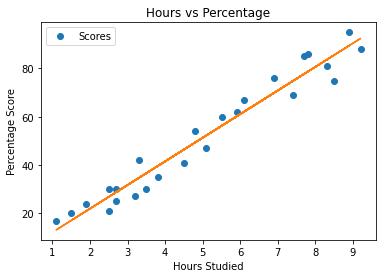

In [42]:
# Plotting the distribution of scores
scores_data.plot(x='Hours', y='Scores', style='o')
plt.plot(X, line);
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

The graph is in aggrement with our above statement.

### Preparing the data into attributes and lables

In [23]:
x = scores_data.iloc[:, :-1].values  
y = scores_data.iloc[:, 1].values  

In [24]:
# Train and test random classification
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

### Training the data to the Linear Regression Model

In [30]:
#Applying Machine Learning model
linear_model=LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [27]:
print('The coefficient is ', linear_model.coef_[0])
print('The intercept is ', linear_model.intercept_)

The coefficient is  9.788566686749046
The Intercept is  2.370815382341881


In [31]:
#Predicting using test set
y_pred=linear_model.predict(x_test)

### Plotting and Visualising the data

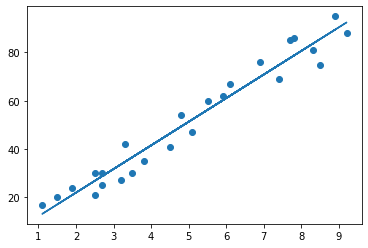

In [28]:
# Plotting the regression line
line = linear_model.coef_*X+linear_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making predications on the data

In [35]:
# Comparing Actual vs Predicted values
drama_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
drama_frame

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


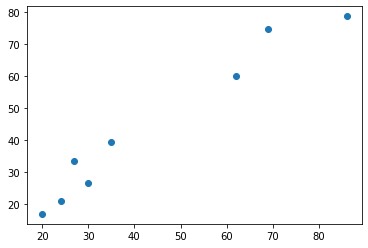

In [45]:
plt.scatter(y_test, y_pred)

This graph shows the variation in the predicted and actual scores.

In [40]:
# testing with our own inputs
hours = 9.25
own_prediction = linear_model.predict(np.array([[hours]]))
print("No of Hours = ",hours)
print("Predicted Score = ", own_prediction)

No of Hours =  9.25
Predicted Score =  [92.91505723]


### Evaluating the Model

In [41]:
#checking Performance of model
from sklearn.metrics import mean_squared_error, r2_score
print('mean square error:', mean_squared_error(y_test, y_pred))
print('r2_score: ', r2_score(y_test,y_pred))

mean square error: 22.96509721270043
r2_score:  0.9568211104435257


Hence, the above model is 95.6% accurate